In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [3]:

data = pd.read_csv(r"C:\Users\AlbandariTami\Downloads\Housing1.csv")

# Display the first few rows of the dataset
print(data.head())

   longitude  housing_median_age  total_rooms  population  households  \
0    -122.23                  41          880         322         126   
1    -122.22                  21         7099        2401        1138   
2    -122.24                  52         1467         496         177   
3    -122.25                  52         1274         558         219   
4    -122.25                  52         1627         565         259   

   median_income  median_house_price  
0         8.3252              452600  
1         8.3014              358500  
2         7.2574              352100  
3         5.6431              341300  
4         3.8462              342200  


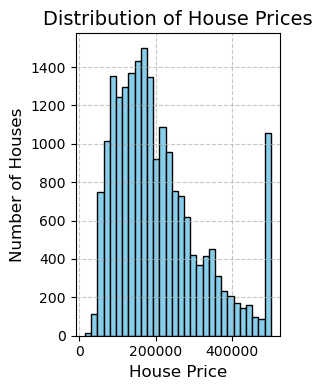

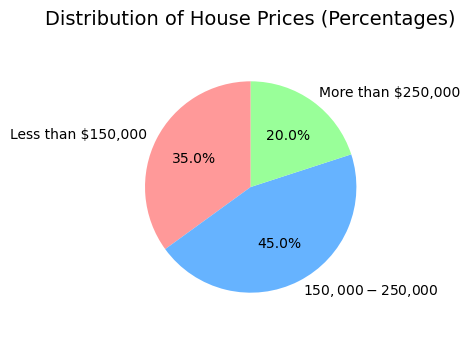

In [4]:
plt.figure(figsize=(3, 4))
plt.hist(data['median_house_price'], bins=30, color='skyblue', edgecolor='black')

# Set titles and labels 
plt.title('Distribution of House Prices', fontsize=14)
plt.xlabel('House Price', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show histogram
plt.show()

# Create pie chart
plt.figure(figsize=(3, 4))

# Define categories and percentages
labels = ['Less than $150,000', '$150,000 - $250,000', 'More than $250,000']
sizes = [35, 45, 20]  # percentages
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of House Prices (Percentages)', fontsize=14)

# Make pie chart circular
plt.axis('equal')

# Show pie chart
plt.show()

In [5]:
data.head(5)

,longitude,housing_median_age,total_rooms,population,households,median_income,median_house_price
0,-122.23,41,880,322,126,8.3252,452600
1,-122.22,21,7099,2401,1138,8.3014,358500
2,-122.24,52,1467,496,177,7.2574,352100
3,-122.25,52,1274,558,219,5.6431,341300
4,-122.25,52,1627,565,259,3.8462,342200


In [6]:
data.shape

(20640, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   housing_median_age  20640 non-null  int64  
 2   total_rooms         20640 non-null  int64  
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   median_house_price  20640 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.1 MB


In [8]:
print(data.isnull().sum())

longitude             0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_price    0
dtype: int64


In [9]:
total_unique_values = data.nunique()
print(total_unique_values)

longitude               844
housing_median_age       52
total_rooms            5926
population             3888
households             1815
median_income         12928
median_house_price     3842
dtype: int64


In [10]:
data[['median_income', 'median_house_price']].describe()

,median_income,median_house_price
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


In [11]:
data.loc[:, ['median_income', 'median_house_price']] = data.loc[:, ['median_income', 'median_house_price']].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   housing_median_age  20640 non-null  int64  
 2   total_rooms         20640 non-null  int64  
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   median_house_price  20640 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.1 MB


Outliers in 'median_income':
0         8.0
1         8.0
131      11.0
134       8.0
135       8.0
         ... 
20426    10.0
20427     8.0
20428     8.0
20436    12.0
20503     8.0
Name: median_income, Length: 691, dtype: float64
Outliers in 'median_house_price':
89       500001
140      483300
459      500001
489      489600
493      500001
          ...  
20422    500001
20426    500001
20427    500001
20436    500001
20443    500001
Name: median_house_price, Length: 1071, dtype: int64


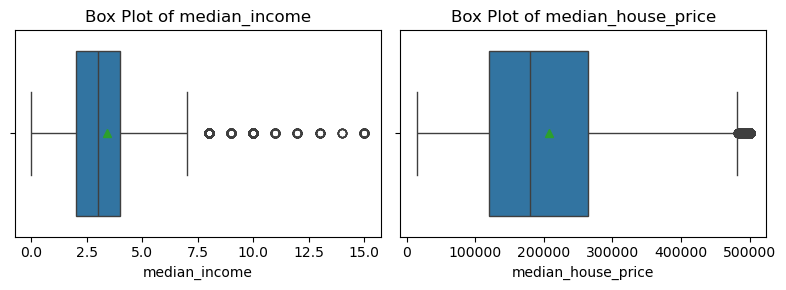

In [13]:
# Select the features you want to analyze for outliers
features_to_analyze = ['median_income', 'median_house_price']

# Create a single figure with two subplots side by side
plt.figure(figsize=(8, 3))

# Loop through the selected features
for idx, feature in enumerate(features_to_analyze, 1):
    # Calculate the IQR
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[feature][(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Print the outliers
    print(f"Outliers in '{feature}':\n{outliers}")

    # Create subplot
    plt.subplot(1, 2, idx)
    sns.boxplot(x=data[feature], showmeans=True)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

Correlation Matrix:
                    median_income  median_house_price
median_income            1.000000            0.678402
median_house_price       0.678402            1.000000


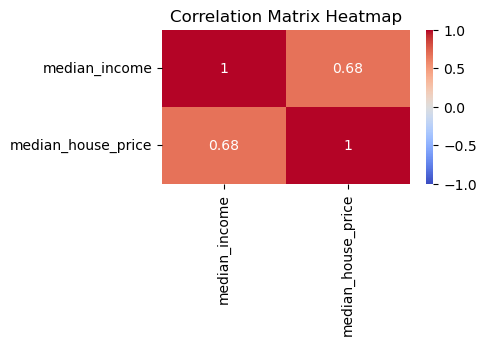

In [14]:
#  Selecting numerical features for correlation analysis
numerical_features= ['median_income', 'median_house_price'] # Update if your column names differ

#  Calculating the correlation matrix
correlation_matrix = data[numerical_features].corr()

#  Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

#  Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
subdata = data.iloc[:, 1:]
subdata.head()

,housing_median_age,total_rooms,population,households,median_income,median_house_price
0,41,880,322,126,8.0,452600
1,21,7099,2401,1138,8.0,358500
2,52,1467,496,177,7.0,352100
3,52,1274,558,219,5.0,341300
4,52,1627,565,259,3.0,342200


In [16]:
#Scaling
subdata = data[['longitude', 'housing_median_age', 'total_rooms', 
                'population', 'households', 'median_income', 'median_house_price']]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the features
scaled_data = scaler.fit_transform(subdata)

# Create a new DataFrame with the standardized data
# Correct column names:
data_standardized = pd.DataFrame(scaled_data, columns=['longitude', 'housing_median_age', 'total_rooms', 
                'population', 'households', 'median_income', 'median_house_price'])
print("Standardized Data:")
data_standardized.head(5)

Standardized Data:


,longitude,housing_median_age,total_rooms,population,households,median_income,median_house_price
0,-1.327835,0.982143,-0.804819,-0.974429,-0.977033,2.384399,2.129631
1,-1.322844,-0.607019,2.045890,0.861439,1.669961,2.384399,1.314156
2,-1.332827,1.856182,-0.535746,-0.820777,-0.843637,1.866842,1.258693
3,-1.337818,1.856182,-0.624215,-0.766028,-0.733781,0.831728,1.165100
4,-1.337818,1.856182,-0.462404,-0.759847,-0.629157,-0.203387,1.172900


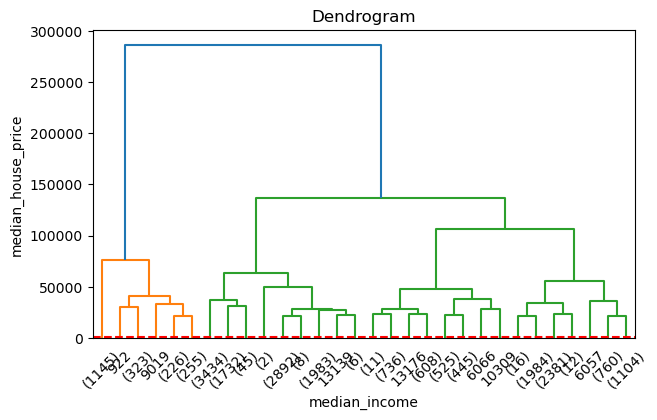

In [17]:
plt.figure(figsize=(7,4))
plt.title('Dendrogram')
plt.xlabel('median_income')
plt.ylabel('median_house_price')
dendrogram=sch.dendrogram(sch.linkage(data,'average' ), truncate_mode='lastp')
plt.axhline(400, c='r', linestyle='--')

In [18]:
# Apply AgglomerativeClustering
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(data[['median_income', 'median_house_price']])

# Add cluster labels to the DataFrame
data['Cluster'] = labels

In [19]:
from sklearn.metrics.pairwise import euclidean_distances
# Calculate Euclidean distances
distance_matrix = euclidean_distances(data[['median_income', 'median_house_price']])

# Print the matrix
print(distance_matrix)

[[     0.          94100.         100500.00000498 ... 360300.000068
  367900.00006659 363200.00004956]
 [ 94100.              0.           6400.00007812 ... 266200.00009204
  273800.00008948 269100.00006689]
 [100500.00000498   6400.00007812      0.         ... 259800.00006928
  267400.00006731 262700.00004758]
 ...
 [360300.000068   266200.00009204 259800.00006928 ...      0.
    7600.           2900.00017241]
 [367900.00006659 273800.00008948 267400.00006731 ...   7600.
       0.           4700.00010638]
 [363200.00004956 269100.00006689 262700.00004758 ...   2900.00017241
    4700.00010638      0.        ]]


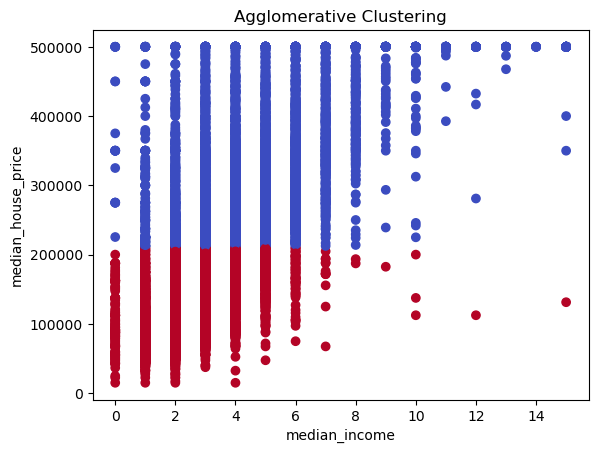

In [20]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(data['median_income'], data['median_house_price'], c=data['Cluster'], cmap='coolwarm')
plt.xlabel('median_income')
plt.ylabel('median_house_price')
plt.title('Agglomerative Clustering')
plt.show()

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


file_path = r"C:\Users\AlbandariTami\Downloads\Housing1.csv"
data = pd.read_csv(file_path)


X = data.drop(columns=["median_house_price"])
y = data["median_house_price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)


mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")


random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")


Decision Tree Results:
Mean Squared Error: 8026635825.77689
R^2 Score: 0.3874709377715124

Random Forest Results:
Mean Squared Error: 3925155037.546356
R^2 Score: 0.7004633589419156


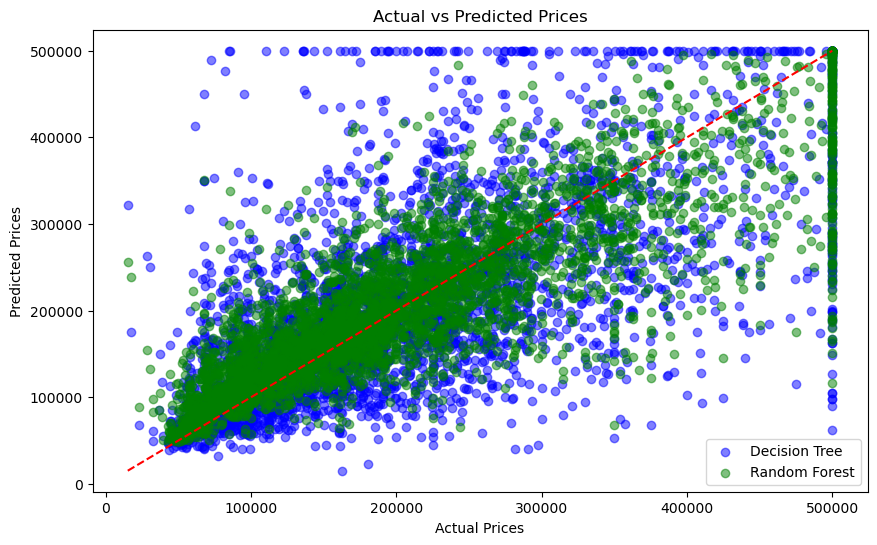

C:\Users\AlbandariTami\AppData\Local\Temp\ipykernel_24128\1353425204.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


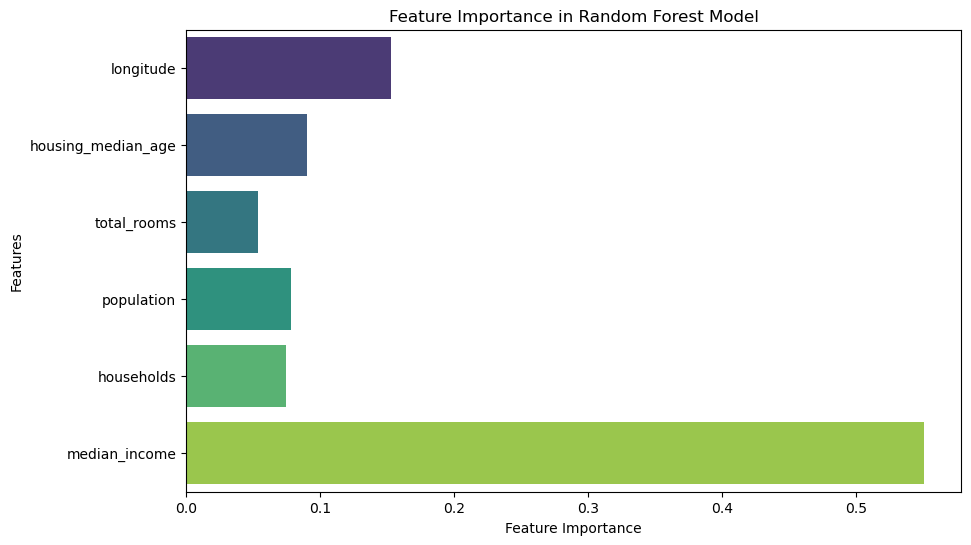

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color="blue", label="Decision Tree")
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="green", label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

feature_importances = random_forest.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


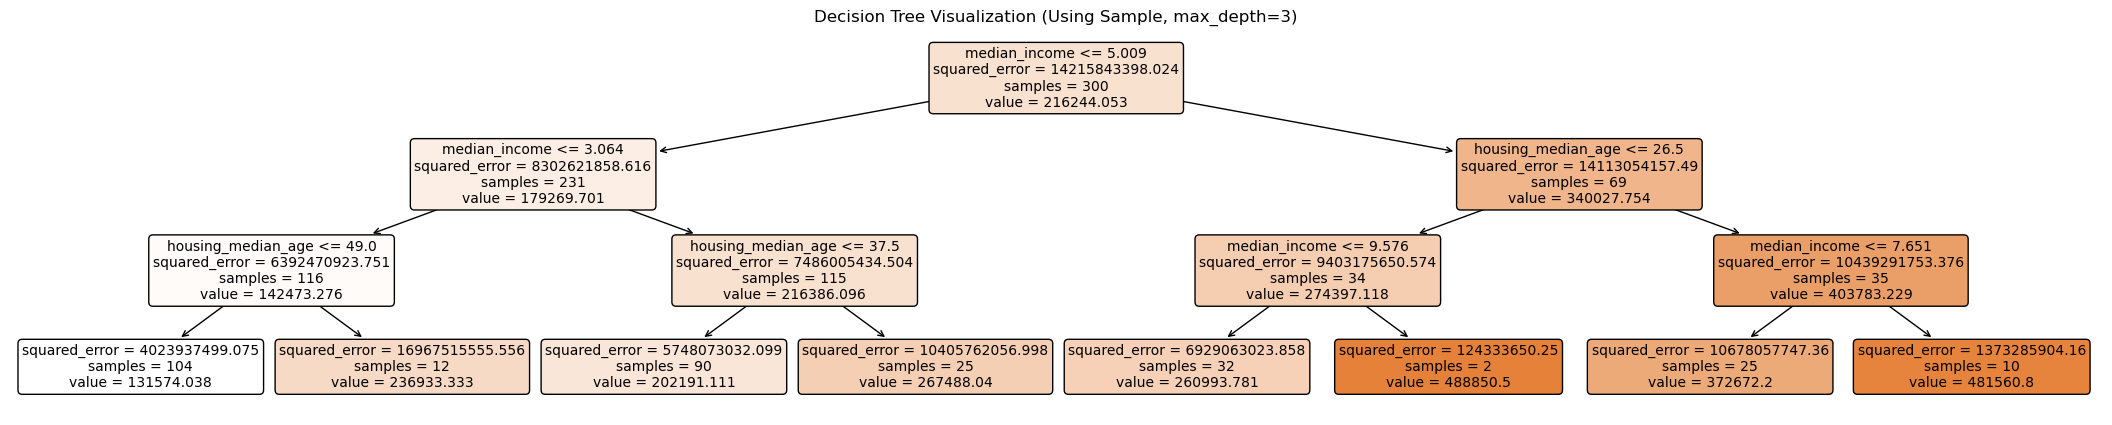

In [24]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

X_sample = X_train.sample(300, random_state=1000)  
y_sample = y_train.loc[X_sample.index]

decision_tree = DecisionTreeRegressor(max_depth=3, random_state=42) 
decision_tree.fit(X_sample, y_sample)

plt.figure(figsize=(27, 5))

plot_tree(
    decision_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization (Using Sample, max_depth=3)")
plt.show()

In [33]:
!pip install summarytools
!pip install skimpy
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
import os
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import missingno as mn
from skimpy import skim
from summarytools import dfSummary
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Create a binary column 'high_house' where 1 means median_house_price > threshold, and 0 otherwise
df['high_house'] = (df['median_house_price'] > threshold).astype(int)


In [36]:
import pandas as pd


df = pd.read_csv(r"C:\Users\AlbandariTami\Downloads\Housing1.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   housing_median_age  20640 non-null  int64  
 2   total_rooms         20640 non-null  int64  
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   median_house_price  20640 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.1 MB


In [38]:
threshold = 500000


In [39]:
# Create a binary column 'high_house' where 1 means median_house_price > threshold, and 0 otherwise
df['high_house'] = (df['median_house_price'] > threshold).astype(int)


In [40]:
# Features (X) - Drop the 'median_income' and 'high_income' columns from features
X = df.drop(columns=['median_income', 'high_house'])

# Target (y) - The new binary target 'high_income'
y = df['high_house']

In [41]:
df[['median_income', 'high_house']].head()

,median_income,high_house
0,8.3252,0
1,8.3014,0
2,7.2574,0
3,5.6431,0
4,3.8462,0


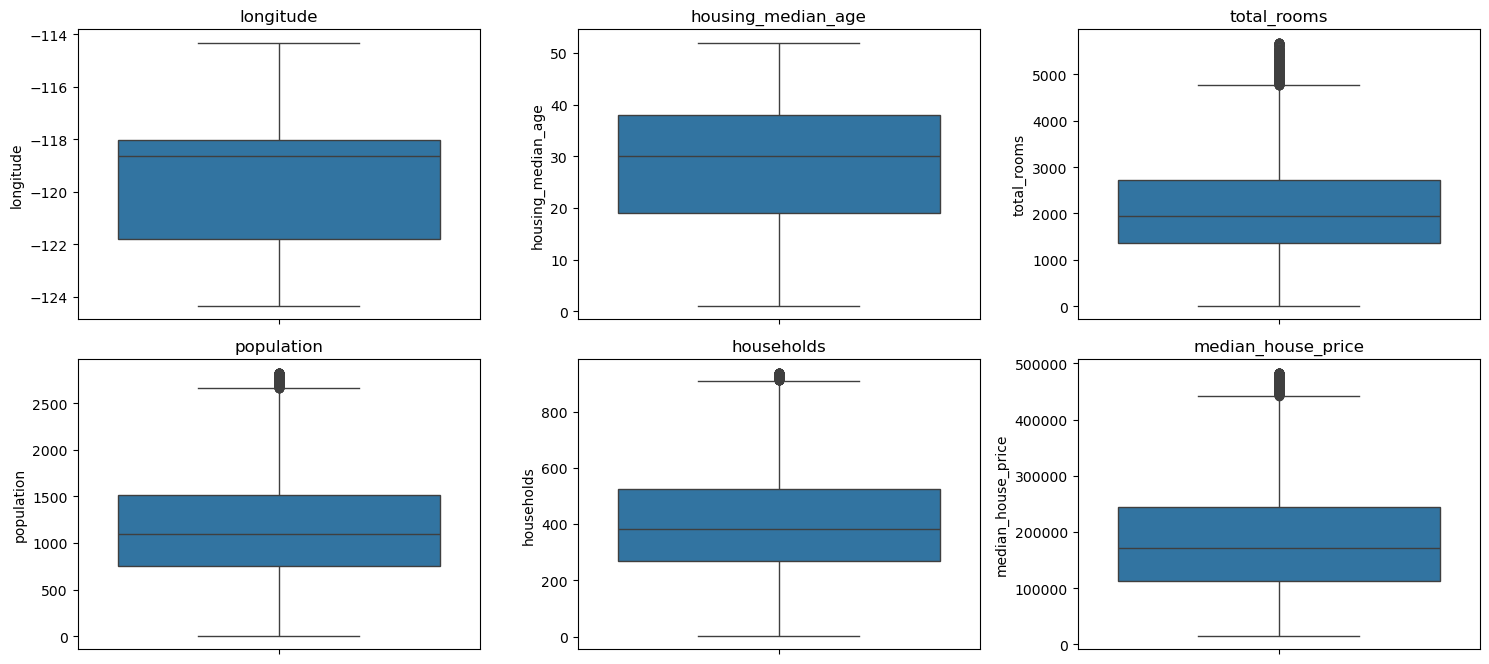

In [42]:
# Identify outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# List of numerical columns in X
numerical_cols = X.select_dtypes(include=np.number).columns

# Remove outliers from each numerical column iteratively
df_no_outliers = df.copy()
for col in numerical_cols:
    df_no_outliers = remove_outliers(df_no_outliers, col)

# Recalculate X after outlier removal
X_no_outliers = df_no_outliers.drop(columns=['median_income', 'high_house'])
y_no_outliers = df_no_outliers['high_house']

# Create boxplots after outlier removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_no_outliers[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16512, 6) (4128, 6)
(16512,) (4128,)


In [44]:
dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.9566


In [45]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [58]:
LR_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    LogisticRegression()
)
LR_model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [48]:
# get predictions for training and testing data
y_training_pred = LR_model.predict(X_train)
y_testing_pred = LR_model.predict(X_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.9923
Testing accuracy :  0.9922


In [49]:
logreg.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0])

In [50]:
logreg.score(X_test , y_test)

0.9922480620155039

In [51]:
logreg.predict_proba(X_test)

array([[1.00000000e+00, 9.28690787e-19],
       [1.00000000e+00, 7.09623470e-19],
       [4.44760051e-01, 5.55239949e-01],
       ...,
       [1.33451663e-01, 8.66548337e-01],
       [1.00000000e+00, 7.43460767e-18],
       [1.00000000e+00, 3.35110971e-14]])

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9922
Confusion Matrix:
[[3925   24]
 [   8  171]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3949
           1       0.88      0.96      0.91       179

    accuracy                           0.99      4128
   macro avg       0.94      0.97      0.96      4128
weighted avg       0.99      0.99      0.99      4128



In [53]:
# Coefficients: This tells you how each feature influences the likelihood of the outcome
coefficients = pd.DataFrame(logreg.coef_, columns=X.columns)
print(coefficients)

   longitude  housing_median_age  total_rooms  population  households  \
0   0.355711           -0.079711     0.000467    -0.00194    0.000607   

   median_house_price  
0            0.000096  


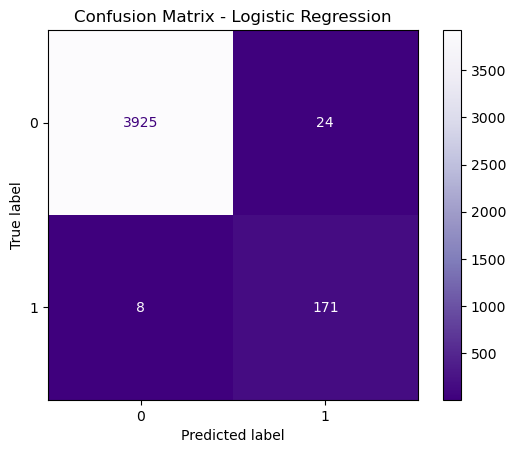

In [54]:
# Predict using the test set
y_pred = logreg.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples_r')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [55]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [57]:
ks_statistic = max(tpr - fpr)  # Find the maximum difference between TPR and FPR
optimal_threshold = thresholds[np.argmax(tpr - fpr)]  # Threshold at which KS is maximized

print(f"KS Statistic (Youden's Index): {ks_statistic:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")

KS Statistic (Youden's Index): 0.9825
Optimal Threshold: 0.1515
